# Classifiers

In [12]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_mldata
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

## Load the MNIST data

In [13]:
mnist = fetch_mldata('MNIST original')
X, y = mnist["data"], mnist["target"]

In [14]:
print(mnist["DESCR"])
print(X.shape, y.shape)

mldata.org dataset: mnist-original
(70000, 784) (70000,)


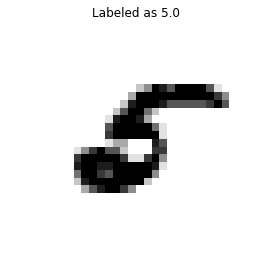

In [15]:
i = np.random.randint(60000)

some_digit = X[i]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.title(f"Labeled as {y[i]}")

plt.show()

In [16]:
XTrain, XTest, yTrain, yTest = X[:60000], X[60000:], y[:60000], y[60000:]

In [17]:
shuffleIndeces = np.random.permutation(60000)
XTrain, yTrain = XTrain[shuffleIndeces], yTrain[shuffleIndeces]

In [18]:
pipe = Pipeline([ ('stdScaler', StandardScaler()) ])
prepTrain = pipe.fit_transform( XTrain )

/usr/lib/python3/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [ ]:
params = { "weights" : ["uniform", "distance"],
           "n_neighbors": [ 3, 4, 5, 6, 7 ] }

knn = KNeighborsClassifier()

gridKNN = GridSearchCV( knn, params, cv = 5, verbose = 3, n_jobs = 1 )
gridKNN.fit(prepTrain, yTrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_neighbors=3, weights=uniform ..................................


In [ ]:
gridKNN.best_score_

In [ ]:
gridKNN.best_params_

In [ ]:
pred = gridKNN.predict(XTest)
accuracy_score(yTest, pred)

## Shift the images by one pixel

In [ ]:
def shiftImages( X, y ):
    """Augments the data by adding copies of each image shifted one pixel
       in each direction. Returns new shuffled arrays."""

    m, n = X.shape

    tmp = X.reshape( (m, np.sqrt(n), np.sqrt(n)) )

    newX = np.zeros( shape = (5*m, n ) )
    newY = np.zeros( shape = y.shape )

    newX[ : m] = X[:]
    newY[ : m] = y[:]
    newX[m : 2*m] = np.roll(tmp, 1, 1).reshape(m,n)
    newY[m : 2*m] = y[:]
    newX[2*m : 3*m] = np.roll(tmp, 1, -1).reshape(m,n)
    newY[2*m : 3*m] = y[:]
    newX[3*m : 4*m] = np.roll(tmp, 2, 1).reshape(m,n)
    newY[3*m : 4*m] = y[:]
    newX[4*m : 5*m] = np.roll(tmp, 2, -1).reshape(m,n)
    newY[4*m : 5*m] = y[:]

    shuffleIndeces = np.random.permutation( len(newX) )

    return newX[shuffleIndeces], newY[shuffleIndeces]


In [ ]:
XShifted, yShifted = shiftImages( XTrain, yTrain )

knn = KNeighborsClassifier( **gridKNN.best_params_ )
knn.fit( XShifted, yShifted )

pred = knn.predict(XTest)
accuracy_score(yTest, pred)